In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [8]:
df = pd.read_csv('salary_data_clean.csv')

### Removing NAN Values

In [9]:
# Identifying columns with NAN values

df.columns[df.isna().any()].tolist()

['MinSalary', 'AvgSalary']

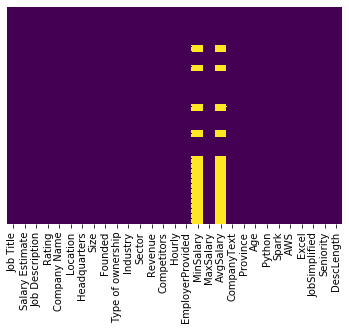

In [10]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.loc[:, df.isna().any()]

,MinSalary,AvgSalary
0,58.0,74.0
1,58.0,74.0
2,58.0,74.0
3,58.0,74.0
4,58.0,74.0
...,...,...
995,NaN,NaN
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN


In [12]:
df.shape

(1000, 29)

In [13]:
# Dropping all the NAN values so the model can make a prediction based on given data

df = df.dropna()

In [14]:
df.shape

(570, 29)

In [15]:
# Loading in data now with the nan values removed

df_model = df[['AvgSalary','Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Hourly', 'Province', 'Age', 'Python', 'Spark', 'AWS', 'Excel', 'JobSimplified', 'Seniority', 'DescLength']]

In [16]:
# Get dummy data for model (either One Hot Encoder of Get_dummies works)

df_dum = pd.get_dummies(df_model)

In [17]:
# Train Test Split into 80/20

from sklearn.model_selection import train_test_split

In [18]:
# Create X and y variables

X = df_dum.drop('AvgSalary', axis=1)
y = df_dum.AvgSalary.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multiple Linear Regression Model

In [20]:
import statsmodels.api as sm

In [21]:
# Create stats model

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\Visitor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.8400
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.865
Time:                        23:50:11   Log-Likelihood:                -2258.5
No. Observations:                 570   AIC:                             4737.
Df Residuals:                     460   BIC:                             5215.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                41.7638      2.447     17.069      0.000      36.956      46.572
Rating                                                0.0180      0.862      0.021      0.983      -1.677       1.712
Hourly                                             2.991e-11   1.35e-10      0.222      0.825   -2.35e-10    2.95e-10
Age                                                   0.0034      0.024      0.143      0.886      -0.044       0.051
Python                                                1.5480      1.785      0.867      0.386      -1.959       5.055
Spark                                                -0.0973      1.693     -0.058      0.954      -3.424       3.229
AWS                                                  -2.7210      1.808     -1.505      0.133      -6.274       0.832
Excel                                                -1.9048      1.455     -1.310      0.191      -4.763       0.954
DescLength                                            0.0005      0.000      1.205      0.229      -0.000       0.001
Size_-1                                               4.2080      1.953      2.155      0.032       0.370       8.046
Size_1 to 50 Employees                                5.5941      2.342      2.389      0.017       0.993      10.196
Size_10000+ Employees                                 3.9437      3.251      1.213      0.226      -2.444      10.332
Size_1001 to 5000 Employees                           6.9128      2.670      2.589      0.010       1.666      12.160
Size_201 to 500 Employees                             4.4684      2.236      1.999      0.046       0.075       8.862
Size_5001 to 10000 Employees                          5.8745      3.779      1.555      0.121      -1.551      13.300
Size_501 to 1000 Employees                           -1.5971      3.118     -0.512      0.609      -7.725       4.531
Size_51 to 200 Employees                              4.3500      2.320      1.875      0.061      -0.208       8.908
Size_Unknown                                          8.0093      5.659      1.415      0.158      -3.111      19.130
Type of ownership_-1                                  4.2080      1.953      2.155      0.032       0.370       8.046
Type of ownership_College / University               12.0239     12.337      0.975      0.330     -12.220      36.268
Type of ownership_Company - Private                   1.5414      2.804      0.550      0.583      -3.969       7.052
Type of ownership_Company - Public                   -0.2318      3.236     -0.072      0.943      -6.590       6.127
Type of ownership_Contract                           -0.0183      8.874     -0.002      0.998     -17.457      17.421
Type of ownersh